In [1]:
import pdb
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import nhanes as nhanes

import seaborn as sns
%matplotlib inline

import time

from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import normalized_mutual_info_score

import re

import gc

In [2]:
import joblib
import scipy
from scipy.optimize import curve_fit
import torch
import importlib

In [3]:
importlib.reload(nhanes)

<module 'nhanes' from '/home/user/nhanes.py'>

In [3]:
DATA_PATH = 'CDC/SELECTED/'


In [4]:
ds = nhanes.Dataset(DATA_PATH)
ds.load_cancer()
n_fe = ds.features.shape[1]
n_classes = 2

In [5]:
names = ds.names
target = ds.targets
features = ds.features
features_df = pd.DataFrame(ds.features)
features_df.columns = names

In [7]:
target.shape
#features.shape

(49454,)

In [324]:
# Seaborn styling for document

sns.set_style('whitegrid')

c=sns.color_palette('cubehelix')
np.random.shuffle(c)
sns.set_palette(c)

#### Feature Importance by Random Forest

In [7]:
# # https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# forest = ExtraTreesClassifier(n_estimators=250)

# forest.fit(features, target)
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

In [8]:
# sorted_imps = importances[indices]
# sorted_labels = features_df.columns[indices]

Text(0.5, 1.0, 'Sorted Feature Importances by Random Forest')

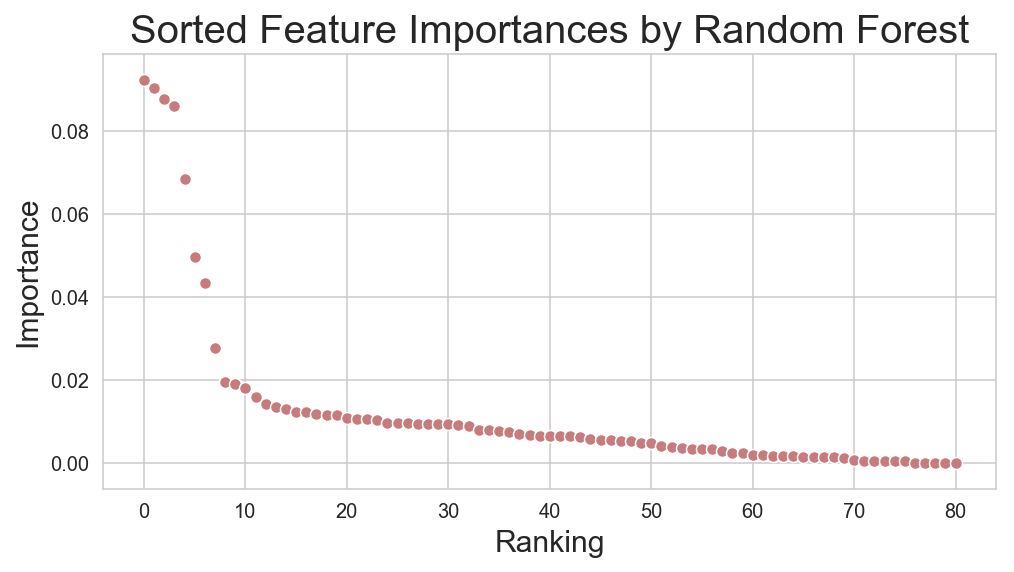

In [11]:
# plt.figure(figsize=(8,4))
# p=sns.scatterplot(range(len(importances)),sorted_imps);
# p.set_xlabel('Ranking',fontsize=15)
# p.set_ylabel('Importance',fontsize=15)
# p.set_title('Sorted Feature Importances by Random Forest',fontsize=20)

In [12]:
# sorted_labels

Index(['BMXBMI', 'BMXWAIST', 'BPXSY1', 'BPXDI1', 'RIDAGEYR', 'SLD010H',
       'INDHHINC', 'SXQ272#2.0', 'RIDRETH1#3.0', 'DMDEDUC2#4.0',
       'DMDEDUC2#3.0', 'DMDEDUC2#5.0', 'DMDEDUC2#2.0', 'RHQ131#1.0', 'RHD180',
       'PAQ605#2.0', 'BPQ057#2.0', 'BPQ020#1.0', 'DMDEDUC2#1.0', 'SMD650#1.0',
       'DIQ170#2.0', 'BPQ020#2.0', 'RIAGENDR#1.0', 'RIAGENDR#2.0', 'ALQ141Q',
       'URXUCL#2.0', 'ALQ151#2.0', 'DIQ160#2.0', 'SMQ020#1.0', 'SMQ020#2.0',
       'DIQ010#2.0', 'LBXTC', 'PAQ610', 'DIQ170#1.0', 'BPQ057#1.0',
       'DIQ010#1.0', 'ARQ125C#2.0', 'MCQ160J#2.0', 'RIDRETH3#3.0',
       'RIDRETH1#1.0', 'MCQ160J#1.0', 'PAQ605#1.0', 'MCQ200#2.0', 'DIQ160#1.0',
       'RIDRETH1#4.0', 'RHQ131#2.0', 'SMD470#0.0', 'HEQ030#2.0', 'HEQ010#2.0',
       'ALQ151#1.0', 'ALQ120Q', 'LBXHP1#0.0', 'RIDRETH1#2.0', 'MCQ200#1.0',
       'LBXHP1#1.0', 'RIDRETH1#5.0', 'SXQ753#2.0', 'LBXHIVC#2.0', 'SMD650#0.0',
       'RIDRETH3#4.0', 'SMD470#1.0', 'SXQ753#1.0', 'SMD480#1.0',
       'RIDRETH3#2.0', 'RIDRETH3#6.

#### Mutual Information

In [7]:
mi_cancer = mutual_info_classif(features,target)
inds = mi_cancer.argsort()
sorted_names = names[inds[::-1]]
sorted_mi = mi_cancer[inds[::-1]]

In [114]:
print(sorted_names)

Index(['SXQ272#2.0', 'RIDAGEYR', 'RIDRETH1#3.0', 'URXUCL#2.0', 'BPQ020#2.0',
       'DIQ010#2.0', 'BPQ020#1.0', 'RHD180', 'ALQ141Q', 'RIDRETH1#1.0',
       'SMQ020#1.0', 'BPXSY1', 'SMQ020#2.0', 'DIQ170#2.0', 'RIAGENDR#1.0',
       'DIQ160#2.0', 'RIDRETH3#6.0', 'RIDRETH1#4.0', 'HEQ010#2.0',
       'PAQ605#2.0', 'RHQ131#1.0', 'RIDRETH3#1.0', 'RIDRETH1#5.0',
       'BPQ057#2.0', 'ALQ151#2.0', 'SLD010H', 'SMD650#1.0', 'BPXDI1',
       'DMDEDUC2#2.0', 'LBXHP1#1.0', 'SXQ753#2.0', 'DIQ010#1.0', 'ARQ125C#1.0',
       'MCQ200#1.0', 'SXQ753#1.0', 'DMDEDUC2#9.0', 'MCQ200#2.0', 'LBXHIVC#2.0',
       'INDHHINC', 'DIQ170#1.0', 'ALQ151#1.0', 'RIDRETH3#3.0', 'DMDEDUC2#1.0',
       'DMDEDUC2#5.0', 'SMD650#0.0', 'RIAGENDR#2.0', 'HEQ030#2.0',
       'LBXHIVC#1.0', 'DMDEDUC2#4.0', 'LBXTC', 'DMDEDUC2#3.0', 'RIDRETH1#2.0',
       'SMD480#1.0', 'PAQ605#1.0', 'ALQ120Q', 'PAQ610', 'ALQ160', 'SXQ272#1.0',
       'BMXWAIST', 'SMD470#1.0', 'HEQ030#1.0', 'RIDRETH3#4.0', 'RIDRETH3#2.0',
       'URXUCL#1.0', 'PAQ677

In [210]:
sorted_mi

array([2.06626772e-02, 1.89693913e-02, 1.38144986e-02, 1.32518869e-02,
       1.28380246e-02, 1.07593222e-02, 9.27515420e-03, 8.03260258e-03,
       7.36387332e-03, 7.23458529e-03, 6.46033268e-03, 5.87808657e-03,
       4.81656519e-03, 4.48231657e-03, 4.34064741e-03, 2.95228857e-03,
       2.83435668e-03, 2.79594060e-03, 2.63464534e-03, 2.57905674e-03,
       2.34468943e-03, 2.19680156e-03, 2.18873058e-03, 2.18448058e-03,
       2.17391712e-03, 2.11242237e-03, 1.90903123e-03, 1.89141768e-03,
       1.86682013e-03, 1.80251723e-03, 1.59737350e-03, 1.57684555e-03,
       1.43096499e-03, 1.40136210e-03, 1.34907328e-03, 1.27214477e-03,
       1.18691828e-03, 1.15240635e-03, 1.13675840e-03, 1.09340922e-03,
       1.08565166e-03, 1.06212281e-03, 1.05321770e-03, 7.71489952e-04,
       7.31147870e-04, 7.08363914e-04, 6.73932548e-04, 6.06556095e-04,
       4.62942093e-04, 4.51162952e-04, 4.48805360e-04, 4.37280892e-04,
       3.39414191e-04, 3.11952234e-04, 1.96938758e-04, 1.96684621e-04,
      

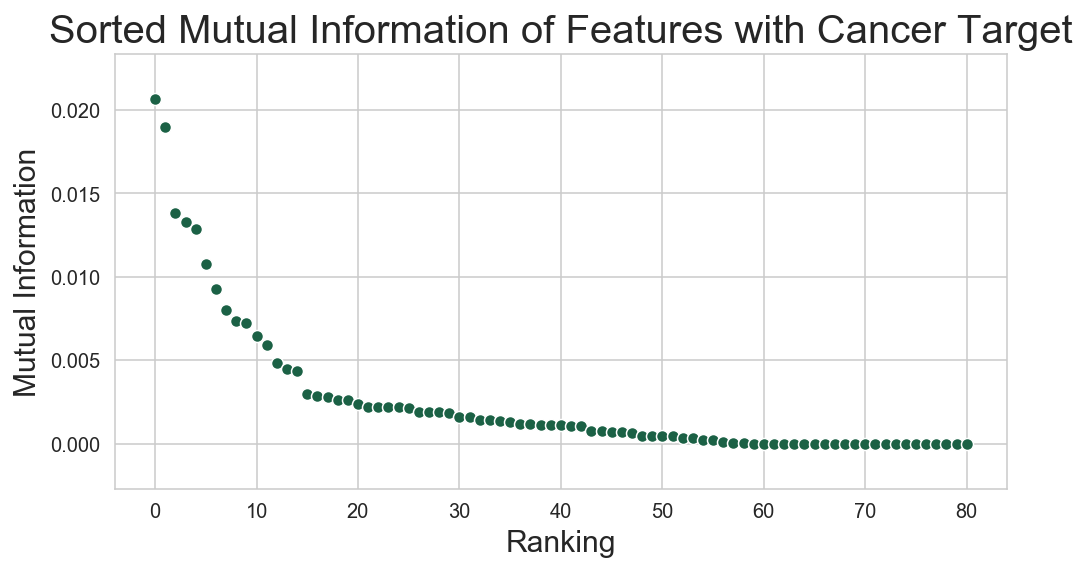

In [192]:
plt.figure(figsize=(8,4))
p=sns.scatterplot(range(len(sorted_mi)),sorted_mi);
p.set_xlabel('Ranking',fontsize=15);
p.set_ylabel('Mutual Information',fontsize=15);
p.set_title('Sorted Mutual Information of Features with Cancer Target',fontsize=20);

In [67]:
def reset_original():
    features = ds.features
    features_df = pd.DataFrame(ds.features)
    features_df.columns = names
    return features, features_df

In [101]:
features, features_df = reset_original()

In [69]:
features.shape

(49454, 81)

In [8]:
# top=pd.concat((pd.DataFrame(sorted_labels),pd.DataFrame(sorted_names)),axis=1)
# top.columns = ['Random Forest','MI']
top = sorted_names[:40]
remaining = features_df[top].copy()
# s1=set(top['Random Forest'])
# s2=set(top['MI'])
# shared = s1.intersection(s2)
# shared=list(shared)


# remaining = features_df[shared].copy()
remaining.shape

(49454, 40)

In [58]:
# calculate normalized mutual information for all feature pairs
t = pd.DataFrame(target,columns=['MCQ220'])
c = pd.concat((t,remaining),axis=1)
compare = ['MCQ220'] + list(remaining.columns)
dim = len(compare)
mi = np.zeros([dim]*2)
for i in range(dim):
    for j in range(dim):
        if i <= j:
            compare1 = compare[i]
            compare2 = compare[j]
            mi[i,j] = normalized_mutual_info_score(c[compare1],c[compare2],average_method='arithmetic')
            mi[j,i] = mi[i,j]

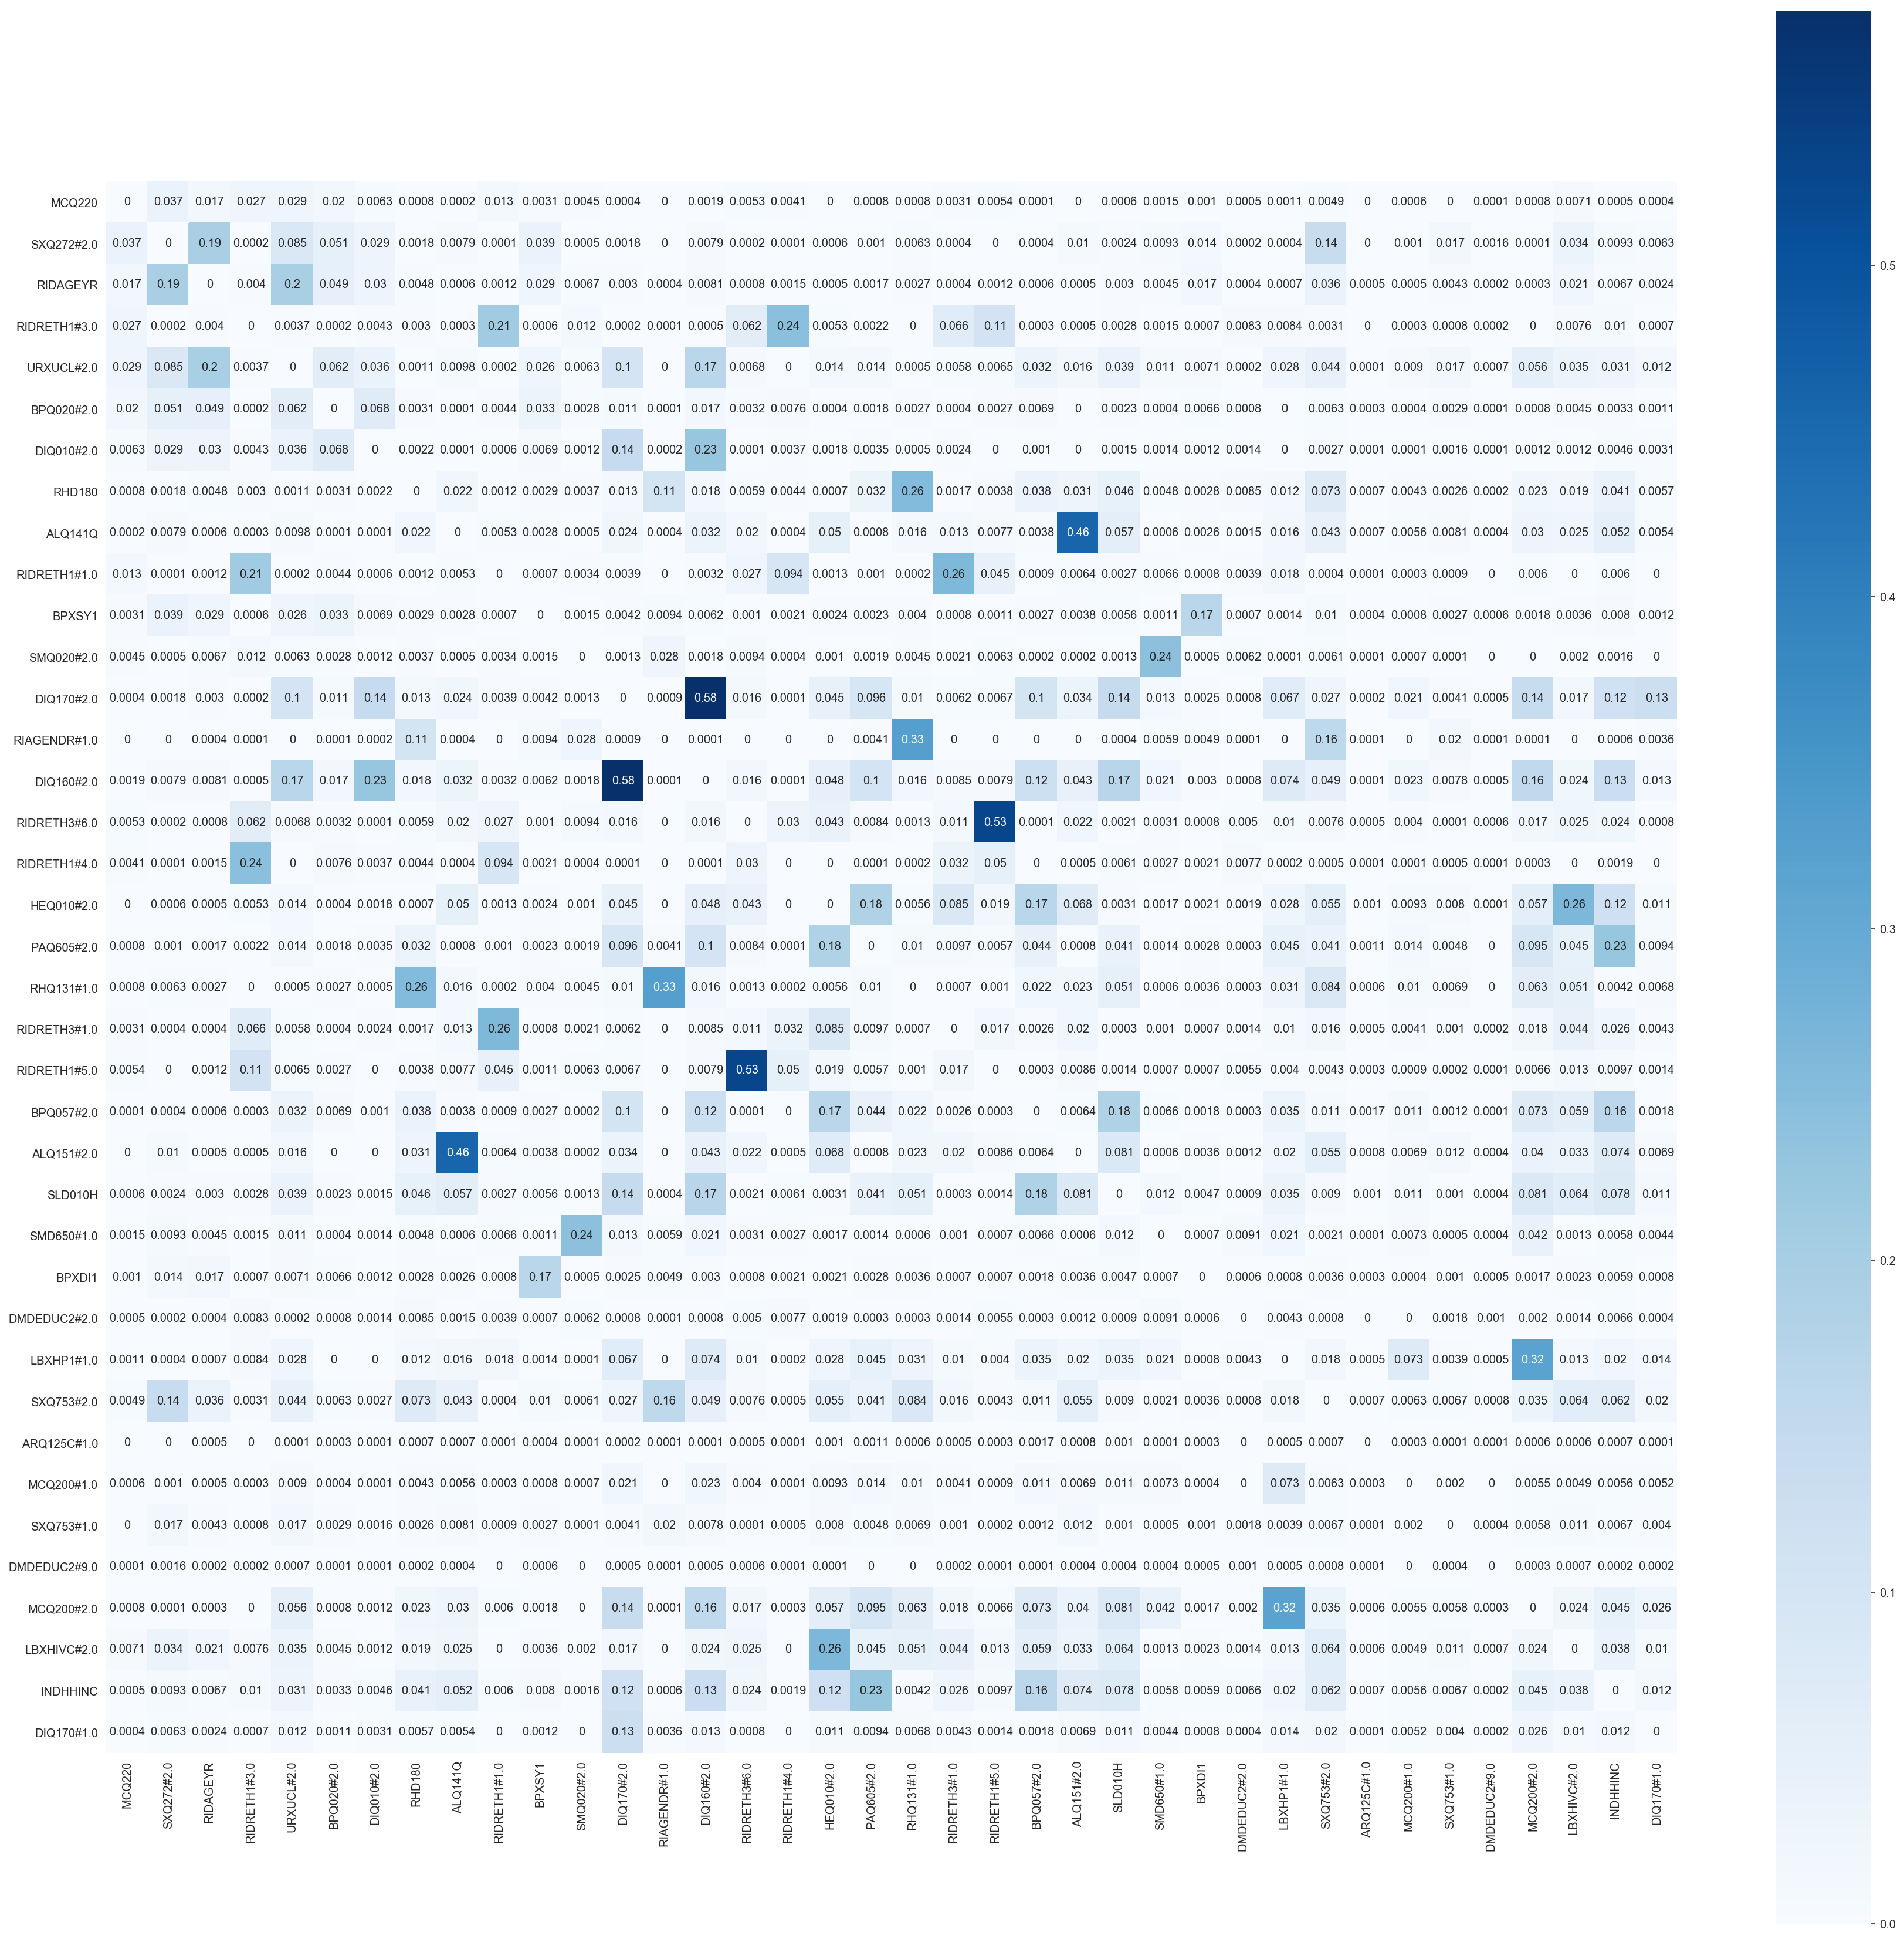

In [59]:
mi_round = np.round(mi,4)
for i in range(dim):
    for j in range(dim):
        if i == j:
            mi_round[i,j] = 0
plt.figure(figsize=(30,30))
sns.heatmap(mi_round,annot=True,square=True,xticklabels=compare,yticklabels=compare,cmap='Blues');

In [10]:
# For each pair of features, drop the one that has more mutual information with other features. Consider all pairs with MI >= 0.75
torm = []
for i in range(dim):
    for j in range(dim):
        if i < j:
            if mi[i,j] >= 0.75:
                summi_i = np.sum(mi[:,i])
                summi_j = np.sum(mi[:,j])
                if summi_j > summi_i:
                    torm.append(compare[j])
                else:
                    torm.append(compare[i])
torm = np.unique(np.array(torm))

In [11]:
remaining.drop(torm, inplace=True, axis=1)
remaining.shape

(49454, 37)

In [12]:
features_df = remaining
features = features_df.values

In [13]:
features.shape

(49454, 37)

## Classification

#### GridSearchCV with oversampling

In [117]:
# Output train and test statistics for best model and parameters for the best model

def search(type,features,target,k,classifier,show_res=True):

    # Perform grid search to choose parameters for input classifier

    clf = classifier()

    scores = ['accuracy','precision','recall','f1','roc_auc']

    f_train, f_test, t_train, t_test = train_test_split(features, target, test_size=0.2, stratify=target)

    # Balance classes
    #ros = RandomOverSampler(sampling_strategy = 'minority')
    ros = SMOTE(sampling_strategy = 'minority')
    pipeline = Pipeline([('sampling', ros), ('class', clf)])

    param_grid = get_params(classifier)

    verbosity = 2 if show_res else False

    if type=='grid':
        clf_grid = GridSearchCV(pipeline, param_grid, scoring=scores, refit='recall', cv=k, verbose=verbosity,return_train_score=True)
    elif type=='random':
        clf_grid = RandomizedSearchCV(pipeline, param_grid, n_iter=20, scoring=scores, refit='recall', cv=k, verbose=verbosity)
    clf_grid.fit(f_train,t_train)

    params=clf_grid.best_params_
    res=clf_grid.cv_results_
    ind=clf_grid.best_index_

    stats_train_arr = np.array([res['mean_train_accuracy'][ind], res['mean_train_precision'][ind], res['mean_train_recall'][ind], res['mean_train_f1'][ind], res['mean_train_roc_auc'][ind]])

    stats_train = pd.DataFrame(stats_train_arr)
    stats_train.index = scores


    stats_validation_arr = np.array([res['mean_test_accuracy'][ind], res['mean_test_precision'][ind], res['mean_test_recall'][ind], res['mean_test_f1'][ind], res['mean_test_roc_auc'][ind]])

    stats_validation = pd.DataFrame(stats_validation_arr)
    stats_validation.index = scores

    pred = clf_grid.predict(f_test)
    probs = clf_grid.predict_proba(f_test)
    probs = probs[:, 1]

    accuracy = accuracy_score(t_test,pred)
    report = precision_recall_fscore_support(t_test,pred)
    auc = roc_auc_score(t_test, probs)

    no_cancer_list = [accuracy] + [report[i][0] for i in range(3)] + [auc]
    cancer_list = [accuracy] + [report[i][1] for i in range(3)] + [auc]

    stats_test_nocancer_arr = np.array(no_cancer_list)
    stats_test_cancer_arr = np.array(cancer_list)

    stats_test = pd.concat([pd.DataFrame(stats_test_nocancer_arr),pd.DataFrame(stats_test_cancer_arr)],axis=1)
    stats_test.index = scores
    stats_test.columns = ['No Cancer','Cancer']

    if show_res:

        print('\n')
        print('Performance Metrics for', classifier, '\n')

        print('Performance Metrics for Train Set\n')
        print(stats_train,'\n')

        print('Performance Metrics for Validation Set\n')
        print(stats_validation,'\n')

        print('Performance Metrics for Test Set\n')
        print('Accuracy for test set is',np.round(accuracy,6),'\n')
        print(stats_test[1:4],'\n')

        print('AUC: %.3f' % auc)

        ROC(t_test,probs)

    return stats_train, stats_validation, stats_test, params

#### ROC Curve

In [15]:
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
def ROC(tt,probs):
    fpr, tpr, thresholds = roc_curve(tt, probs)
    plt.plot([0, 1], [0, 1], linestyle='-',color='lightblue')
    plt.plot(fpr, tpr, marker='.',color='magenta')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve for Classifier')
    plt.show()

In [479]:
def get_params(fn):
    if fn == LogisticRegression:
        #return {'class__solver':['saga'],'class__penalty':['l1','l2'],'class__max_iter': [250], 'class__C': [0.001, 0.1, 1, 10]}
        return {'class__solver':['saga'],'class__penalty':['l1'],'class__max_iter': [1000], 'class__C': [0.1]}
    elif fn == SVC:
        return {'class__C': [0.1],'class__gamma': ['scale'],'class__kernel': ['linear'],'class__probability': [True]}
        #return {'class__gamma': ['scale'], 'class__kernel':['linear', 'poly', 'rbf'],'class__probability': [True], 'class__C': [0.001, 0.1, 1, 10]}
        #return {'class__probability': [True],'class__gamma': ['scale']}
    elif fn == RandomForestClassifier:
        return {'class__n_estimators':[250],'class__max_depth': [3],'class__min_samples_leaf': [4], 'class__min_samples_split': [5],'class__max_features':[20]}
        #return {'class__n_estimators':[250],'class__max_depth': np.arange(3,20,5),'class__max_features':[20],'class__min_samples_leaf': np.arange(2,11,2), 'class__min_samples_split': np.arange(5,30,5)}
    elif fn == MLPClassifier:
        return {'class__solver': ['sgd'],
         'class__learning_rate': ['adaptive'],
         'class__hidden_layer_sizes': [(100,)],
         'class__alpha': [0.05],
         'class__activation': ['tanh']}
        #return {'class__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],'class__activation': ['tanh', 'relu'],'class__solver': ['sgd', 'adam'],'class__alpha': [0.0001, 0.05],'class__learning_rate':['constant','adaptive']}
        #return {'class__max_iter': [250]}
    elif fn == KNeighborsClassifier:
        #return {'class__n_neighbors':[33]}
        #return {'class__n_neighbors':np.arange(25,30,1),'class__weights':['uniform','distance'],'class__metric':['euclidean','manhattan','minkowski']}
        return {'class__n_neighbors':np.arange(25,35,1),'class__weights':['uniform','distance'],'class__metric':['minkowski']}
    else: return False

#### Logistic Regression

Performing grid search


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


/ext/anaconda5/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Grid search complete


Performance Metrics for <class 'sklearn.linear_model.logistic.LogisticRegression'> 

Performance Metrics for Train Set

                  0
accuracy   0.706412
precision  0.199392
recall     0.724170
f1         0.312670
roc_auc    0.777454 

Performance Metrics for Test Set

Accuracy for test set is 0.71755 

           No Cancer    Cancer
precision   0.959916  0.212102
recall      0.717576  0.717300
f1          0.821241  0.327395 

AUC: 0.775


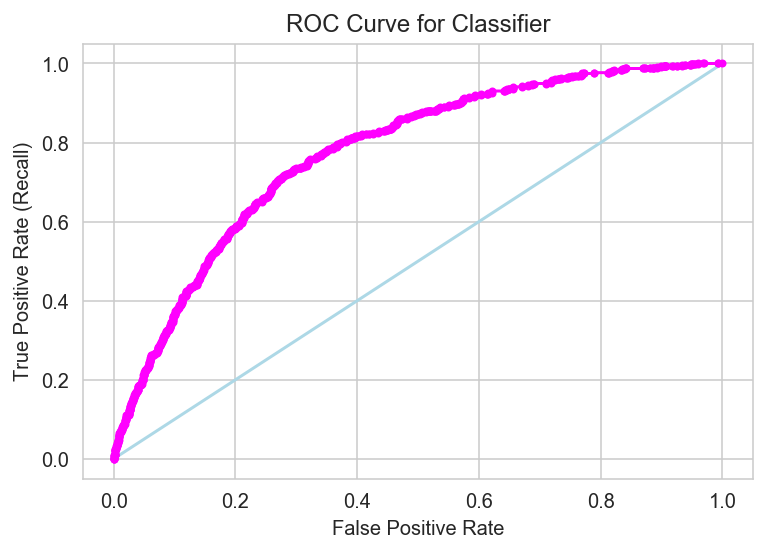

836.1863660812378

In [159]:
start = time.time()
stats_train_logit, stats_test_logit, best_logit = grid(features,target,3,LogisticRegression)
end = time.time()
elapsed = end-start
elapsed

In [143]:
best_logit

{'class__C': 0.1,
 'class__max_iter': 1000,
 'class__penalty': 'l1',
 'class__solver': 'saga'}

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   3.4s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   3.6s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   3.5s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   4.2s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   4.0s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   4.0s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   3.6s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   3.4s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   3.9s
[CV] class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga 


[CV]  class__C=0.1, class__max_iter=1000, class__penalty=l1, class__solver=saga, total=   3.6s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   38.1s finished




Performance Metrics for <class 'sklearn.linear_model.logistic.LogisticRegression'> 

Performance Metrics for Train Set

                  0
accuracy   0.710543
precision  0.201916
recall     0.720432
f1         0.315426
roc_auc    0.780470 

Performance Metrics for Validation Set

                  0
accuracy   0.709552
precision  0.200600
recall     0.715999
f1         0.313368
roc_auc    0.777986 

Performance Metrics for Test Set

Accuracy for test set is 0.705894 

           No Cancer    Cancer
precision   0.961644  0.199940
recall      0.703955  0.724891
f1          0.812866  0.313429 

AUC: 0.777


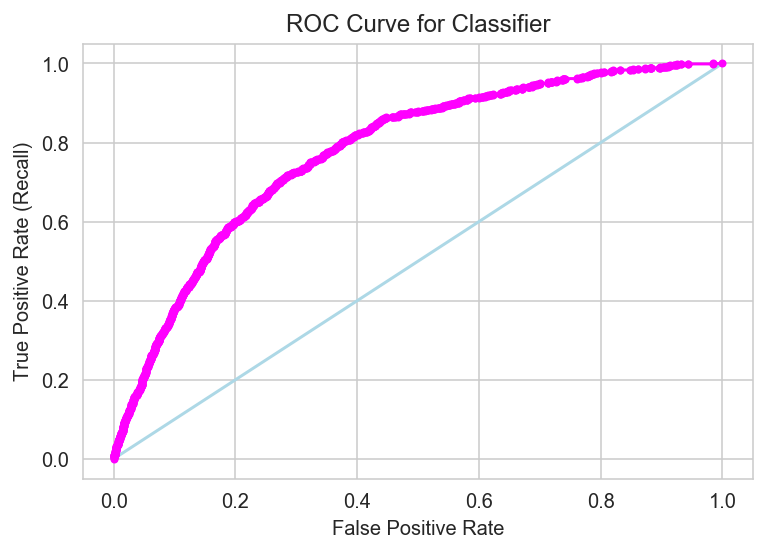

In [152]:
stats_train_logit, stats_validation_logit, stats_test_logit, best_logit = search('grid',features,target,10,LogisticRegression)

#### Support Vector Machine

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] class__C=0.001, class__gamma=scale, class__kernel=linear, class__probability=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class__C=0.001, class__gamma=scale, class__kernel=linear, class__probability=True, total=   8.6s
[CV] class__C=0.001, class__gamma=scale, class__kernel=linear, class__probability=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV]  class__C=0.001, class__gamma=scale, class__kernel=linear, class__probability=True, total=   8.1s
[CV] class__C=0.001, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=0.001, class__gamma=scale, class__kernel=linear, class__probability=True, total=   9.2s
[CV] class__C=0.001, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=0.001, class__gamma=scale, class__kernel=poly, class__probability=True, total=  10.5s
[CV] class__C=0.001, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=0.001, class__gamma=scale, class__kernel=poly, class__probability=True, total=  10.7s
[CV] class__C=0.001, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=0.001, class__gamma=scale, class__kernel=poly, class__probability=True, total=  10.9s
[CV] class__C=0.001, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=0.001, class__gamma=scale, class__kernel=rbf, class__probability=True, total=  16.9s
[CV] class__C=0.001, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=0.001, class__gamma=scale, class__kernel=rbf, class__probability=True, total=  16.1s
[CV] class__C=0.001, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=0.001, class__gamma=scale, class__kernel=rbf, class__probability=True, total=  16.3s
[CV] class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True, total=   7.2s
[CV] class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True, total=   7.3s
[CV] class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True, total=   7.1s
[CV] class__C=0.1, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=poly, class__probability=True, total=   9.1s
[CV] class__C=0.1, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=poly, class__probability=True, total=   9.6s
[CV] class__C=0.1, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=poly, class__probability=True, total=   9.0s
[CV] class__C=0.1, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=rbf, class__probability=True, total=  12.0s
[CV] class__C=0.1, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=rbf, class__probability=True, total=  11.4s
[CV] class__C=0.1, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=rbf, class__probability=True, total=  11.8s
[CV] class__C=1, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=linear, class__probability=True, total=  11.7s
[CV] class__C=1, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=linear, class__probability=True, total=  10.5s
[CV] class__C=1, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=linear, class__probability=True, total=  11.6s
[CV] class__C=1, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=poly, class__probability=True, total=   8.9s
[CV] class__C=1, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=poly, class__probability=True, total=   8.2s
[CV] class__C=1, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=poly, class__probability=True, total=   7.8s
[CV] class__C=1, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=rbf, class__probability=True, total=  10.2s
[CV] class__C=1, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=rbf, class__probability=True, total=   9.5s
[CV] class__C=1, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=1, class__gamma=scale, class__kernel=rbf, class__probability=True, total=   9.6s
[CV] class__C=10, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=linear, class__probability=True, total=  31.0s
[CV] class__C=10, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=linear, class__probability=True, total=  30.0s
[CV] class__C=10, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=linear, class__probability=True, total=  31.0s
[CV] class__C=10, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=poly, class__probability=True, total=   7.7s
[CV] class__C=10, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=poly, class__probability=True, total=   7.7s
[CV] class__C=10, class__gamma=scale, class__kernel=poly, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=poly, class__probability=True, total=   8.3s
[CV] class__C=10, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=rbf, class__probability=True, total=   8.0s
[CV] class__C=10, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=rbf, class__probability=True, total=   8.5s
[CV] class__C=10, class__gamma=scale, class__kernel=rbf, class__probability=True 


[CV]  class__C=10, class__gamma=scale, class__kernel=rbf, class__probability=True, total=   9.0s


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  8.5min finished




Performance Metrics for <class 'sklearn.svm.classes.SVC'> 

Performance Metrics for Train Set

                  0
accuracy   0.703998
precision  0.196118
recall     0.759184
f1         0.311700
roc_auc    0.790152 

Performance Metrics for Validation Set

                  0
accuracy   0.697000
precision  0.187646
recall     0.730828
f1         0.298596
roc_auc    0.761293 

Performance Metrics for Test Set

Accuracy for test set is 0.688 

           No Cancer    Cancer
precision   0.968750  0.188889
recall      0.679825  0.772727
f1          0.798969  0.303571 

AUC: 0.794


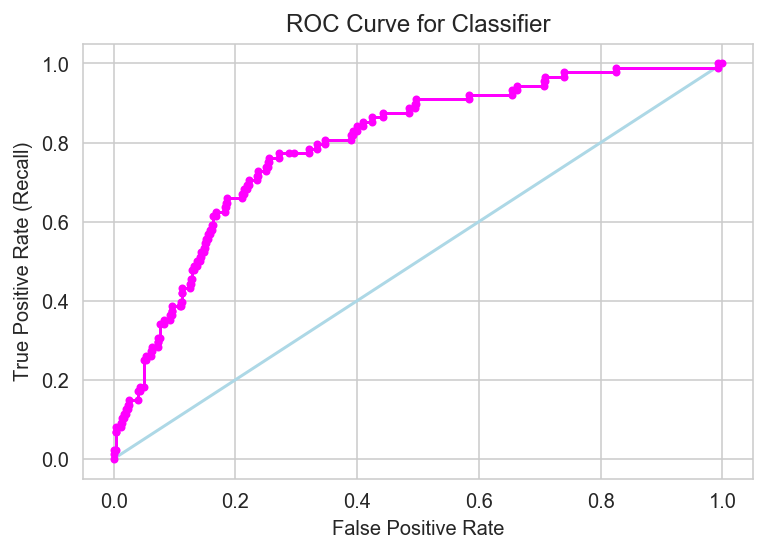

In [122]:
stats_train_svm, stats_validation_svm, stats_test_svm, best_svm = search('grid',features[:5000],target[:5000],3,SVC)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True, total=22.0min
[CV] class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 25.1min remaining:    0.0s


[CV]  class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True, total=21.9min
[CV] class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True 


[CV]  class__C=0.1, class__gamma=scale, class__kernel=linear, class__probability=True, total=19.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 73.0min finished




Performance Metrics for <class 'sklearn.svm.classes.SVC'> 

Performance Metrics for Train Set

                  0
accuracy   0.705571
precision  0.199935
recall     0.726378
f1         0.313554
roc_auc    0.778485 

Performance Metrics for Validation Set

                  0
accuracy   0.703814
precision  0.197022
recall     0.715182
f1         0.308931
roc_auc    0.773729 

Performance Metrics for Test Set

Accuracy for test set is 0.705995 

           No Cancer    Cancer
precision   0.961509  0.199819
recall      0.704178  0.723799
f1          0.812966  0.313179 

AUC: 0.774


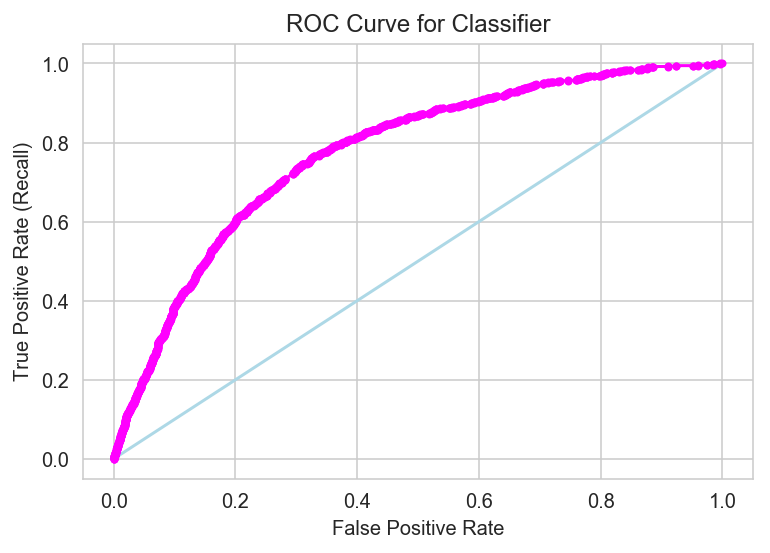

In [126]:
stats_train_svm, stats_validation_svm, stats_test_svm, best_svm = search('grid',features,target,3,SVC)

In [123]:
best_svm

{'class__C': 10,
 'class__gamma': 'scale',
 'class__kernel': 'linear',
 'class__probability': True}

#### Random Forest

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   1.6s
[CV] class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   1.7s
[CV] class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   1.7s
[CV] class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   3.4s
[CV] class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   3.0s
[CV] class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   2.7s
[CV] class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   3.4s
[CV] class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   3.2s
[CV] class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   3.4s
[CV] class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   3.3s
[CV] class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   3.3s
[CV] class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=   3.2s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   41.0s finished




Performance Metrics for <class 'sklearn.ensemble.forest.RandomForestClassifier'> 

Performance Metrics for Train Set

                  0
accuracy   0.758624
precision  0.212405
recall     0.641574
f1         0.319137
roc_auc    0.785137 

Performance Metrics for Validation Set

                  0
accuracy   0.751750
precision  0.200090
recall     0.600561
f1         0.299940
roc_auc    0.763822 

Performance Metrics for Test Set

Accuracy for test set is 0.735 

           No Cancer    Cancer
precision   0.958865  0.200000
recall      0.741228  0.670455
f1          0.836116  0.308094 

AUC: 0.803


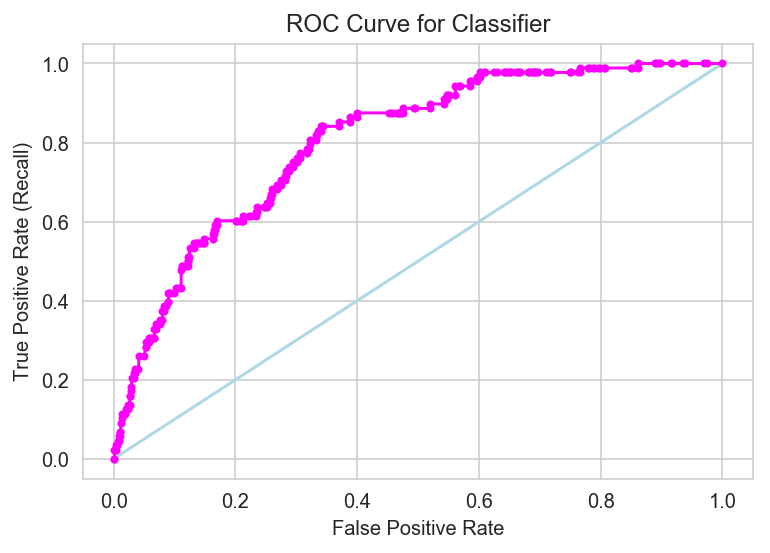

In [208]:
stats_train_rf, stats_validation_rf, stats_test_rf, best_rf = search('grid',features[:5000],target[:5000],3,RandomForestClassifier)

In [329]:
best_rf

{'class__max_depth': 3,
 'class__max_features': 20,
 'class__min_samples_leaf': 4,
 'class__min_samples_split': 5,
 'class__n_estimators': 250}

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  20.6s
[CV] class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s remaining:    0.0s


[CV]  class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  16.7s
[CV] class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=3, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  17.9s
[CV] class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  28.3s
[CV] class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  31.2s
[CV] class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=8, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  28.5s
[CV] class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  40.8s
[CV] class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  37.2s
[CV] class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=13, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  38.8s
[CV] class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  44.3s
[CV] class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  42.7s
[CV] class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250 


[CV]  class__max_depth=18, class__max_features=20, class__min_samples_leaf=4, class__min_samples_split=5, class__n_estimators=250, total=  40.9s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  7.6min finished




Performance Metrics for <class 'sklearn.ensemble.forest.RandomForestClassifier'> 

Performance Metrics for Train Set

                  0
accuracy   0.781538
precision  0.228405
recall     0.571545
f1         0.326317
roc_auc    0.777107 

Performance Metrics for Validation Set

                  0
accuracy   0.780780
precision  0.227499
recall     0.569906
f1         0.325037
roc_auc    0.774859 

Performance Metrics for Test Set

Accuracy for test set is 0.790314 

           No Cancer    Cancer
precision   0.944595  0.228169
recall      0.816825  0.530568
f1          0.876076  0.319107 

AUC: 0.772


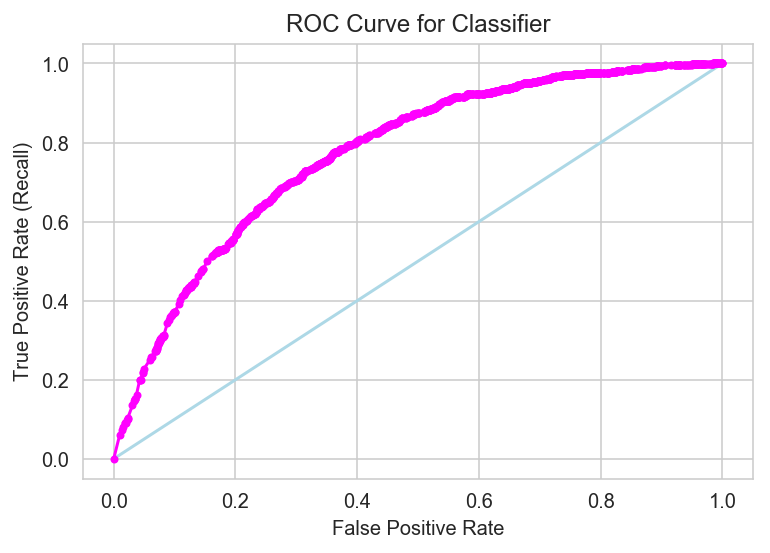

In [209]:
stats_train_rf, stats_validation_rf, stats_test_rf, best_rf = search('grid',features,target,3,RandomForestClassifier)

#### Multi-Layer Perceptron Classifier

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class__activation=tanh, class__alpha=0.05, class__hidden_layer_sizes=(100,), class__learning_rate=adaptive, class__solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


/ext/anaconda5/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  class__activation=tanh, class__alpha=0.05, class__hidden_layer_sizes=(100,), class__learning_rate=adaptive, class__solver=sgd, total= 2.7min
[CV] class__activation=tanh, class__alpha=0.05, class__hidden_layer_sizes=(100,), class__learning_rate=adaptive, class__solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


/ext/anaconda5/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  class__activation=tanh, class__alpha=0.05, class__hidden_layer_sizes=(100,), class__learning_rate=adaptive, class__solver=sgd, total= 2.5min
[CV] class__activation=tanh, class__alpha=0.05, class__hidden_layer_sizes=(100,), class__learning_rate=adaptive, class__solver=sgd 


/ext/anaconda5/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  class__activation=tanh, class__alpha=0.05, class__hidden_layer_sizes=(100,), class__learning_rate=adaptive, class__solver=sgd, total= 2.6min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.9min finished


/ext/anaconda5/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




Performance Metrics for <class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'> 

Performance Metrics for Train Set

                  0
accuracy   0.723365
precision  0.213979
recall     0.741417
f1         0.332105
roc_auc    0.803747 

Performance Metrics for Validation Set

                  0
accuracy   0.718272
precision  0.205144
recall     0.708445
f1         0.318150
roc_auc    0.784694 

Performance Metrics for Test Set

Accuracy for test set is 0.732181 

           No Cancer    Cancer
precision   0.961796  0.212990
recall      0.734276  0.711454
f1          0.832776  0.327836 

AUC: 0.801


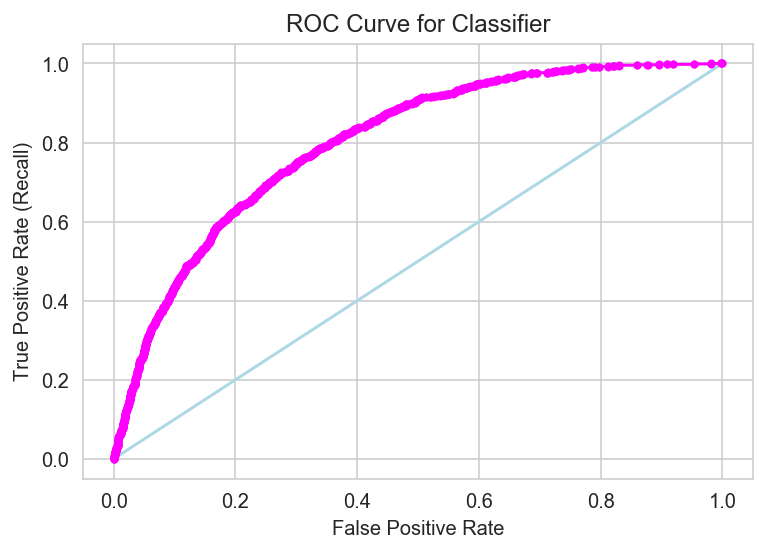

In [97]:
stats_train_mlp, stats_validation_mlp, stats_test_mlp, best_mlp = search('grid',features,target,3,MLPClassifier)

In [380]:
best_mlp

{'class__activation': 'tanh',
 'class__alpha': 0.05,
 'class__hidden_layer_sizes': (100,),
 'class__learning_rate': 'adaptive',
 'class__solver': 'sgd'}

#### K Nearest Neighbors

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] class__metric=euclidean, class__n_neighbors=23, class__weights=uniform 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class__metric=euclidean, class__n_neighbors=23, class__weights=uniform, total=   2.2s
[CV] class__metric=euclidean, class__n_neighbors=23, class__weights=uniform 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  class__metric=euclidean, class__n_neighbors=23, class__weights=uniform, total=   2.0s
[CV] class__metric=euclidean, class__n_neighbors=23, class__weights=uniform 


[CV]  class__metric=euclidean, class__n_neighbors=23, class__weights=uniform, total=   2.2s
[CV] class__metric=euclidean, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=euclidean, class__n_neighbors=23, class__weights=distance, total=   2.0s
[CV] class__metric=euclidean, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=euclidean, class__n_neighbors=23, class__weights=distance, total=   2.0s
[CV] class__metric=euclidean, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=euclidean, class__n_neighbors=23, class__weights=distance, total=   2.0s
[CV] class__metric=manhattan, class__n_neighbors=23, class__weights=uniform 


[CV]  class__metric=manhattan, class__n_neighbors=23, class__weights=uniform, total=   2.8s
[CV] class__metric=manhattan, class__n_neighbors=23, class__weights=uniform 


[CV]  class__metric=manhattan, class__n_neighbors=23, class__weights=uniform, total=   3.1s
[CV] class__metric=manhattan, class__n_neighbors=23, class__weights=uniform 


[CV]  class__metric=manhattan, class__n_neighbors=23, class__weights=uniform, total=   2.8s
[CV] class__metric=manhattan, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=manhattan, class__n_neighbors=23, class__weights=distance, total=   3.3s
[CV] class__metric=manhattan, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=manhattan, class__n_neighbors=23, class__weights=distance, total=   2.7s
[CV] class__metric=manhattan, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=manhattan, class__n_neighbors=23, class__weights=distance, total=   3.6s
[CV] class__metric=minkowski, class__n_neighbors=23, class__weights=uniform 


[CV]  class__metric=minkowski, class__n_neighbors=23, class__weights=uniform, total=   2.1s
[CV] class__metric=minkowski, class__n_neighbors=23, class__weights=uniform 


[CV]  class__metric=minkowski, class__n_neighbors=23, class__weights=uniform, total=   2.2s
[CV] class__metric=minkowski, class__n_neighbors=23, class__weights=uniform 


[CV]  class__metric=minkowski, class__n_neighbors=23, class__weights=uniform, total=   2.1s
[CV] class__metric=minkowski, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=minkowski, class__n_neighbors=23, class__weights=distance, total=   2.2s
[CV] class__metric=minkowski, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=minkowski, class__n_neighbors=23, class__weights=distance, total=   1.9s
[CV] class__metric=minkowski, class__n_neighbors=23, class__weights=distance 


[CV]  class__metric=minkowski, class__n_neighbors=23, class__weights=distance, total=   2.3s


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.2min finished




Performance Metrics for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> 

Performance Metrics for Train Set

                  0
accuracy   0.605252
precision  0.177150
recall     0.950427
f1         0.298568
roc_auc    0.885837 

Performance Metrics for Validation Set

                  0
accuracy   0.568250
precision  0.138169
recall     0.742253
f1         0.232951
roc_auc    0.710040 

Performance Metrics for Test Set

Accuracy for test set is 0.58 

           No Cancer    Cancer
precision   0.976744  0.157025
recall      0.552632  0.863636
f1          0.705882  0.265734 

AUC: 0.753


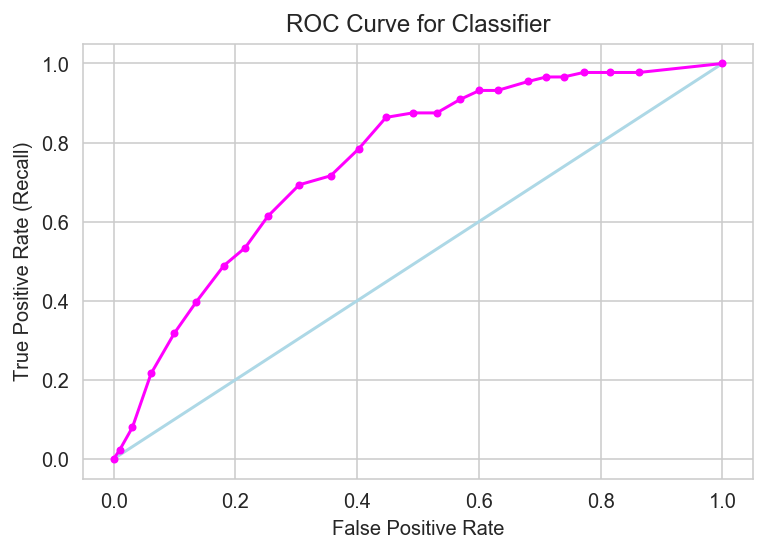

In [342]:
stats_train_knn, stats_validation_knn, stats_test_knn, best_knn = search('grid',features[:5000],target[:5000],3,KNeighborsClassifier)

In [167]:
best_knn

{'class__n_neighbors': 23}

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class__n_neighbors=23 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ class__n_neighbors=23, total= 2.9min
[CV] class__n_neighbors=23 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.4min remaining:    0.0s


[CV] ............................ class__n_neighbors=23, total= 3.7min
[CV] class__n_neighbors=23 ...........................................


[CV] ............................ class__n_neighbors=23, total= 2.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 27.9min finished




Performance Metrics for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> 

Performance Metrics for Train Set

                  0
accuracy   0.664270
precision  0.208743
recall     0.941289
f1         0.341703
roc_auc    0.900885 

Performance Metrics for Validation Set

                  0
accuracy   0.629553
precision  0.167908
recall     0.758875
f1         0.274972
roc_auc    0.744637 

Performance Metrics for Test Set

Accuracy for test set is 0.636336 

           No Cancer    Cancer
precision   0.960919  0.169583
recall      0.624624  0.751092
f1          0.757107  0.276694 

AUC: 0.746


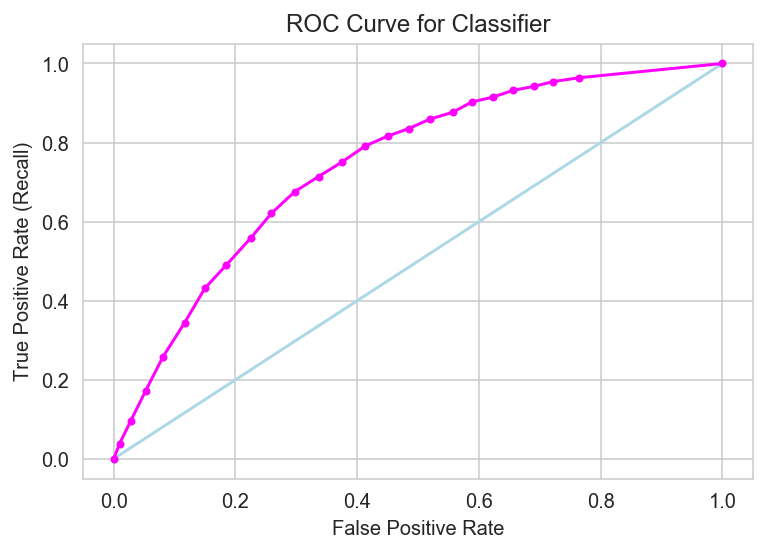

In [165]:
stats_train_knn, stats_validation_knn, stats_test_knn, best_knn = search('grid',features,target,3,KNeighborsClassifier)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] class__n_neighbors=33 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ class__n_neighbors=33, total= 3.2min
[CV] class__n_neighbors=33 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  9.3min remaining:    0.0s


[CV] ............................ class__n_neighbors=33, total= 3.1min
[CV] class__n_neighbors=33 ...........................................


[CV] ............................ class__n_neighbors=33, total= 2.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 26.8min finished




Performance Metrics for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> 

Performance Metrics for Train Set

                  0
accuracy   0.645793
precision  0.195897
recall     0.910432
f1         0.322418
roc_auc    0.872208 

Performance Metrics for Validation Set

                  0
accuracy   0.618861
precision  0.165836
recall     0.773620
f1         0.273124
roc_auc    0.747988 

Performance Metrics for Test Set

Accuracy for test set is 0.621373 

           No Cancer    Cancer
precision   0.962504  0.166155
recall      0.606351  0.768559
f1          0.744002  0.273239 

AUC: 0.751


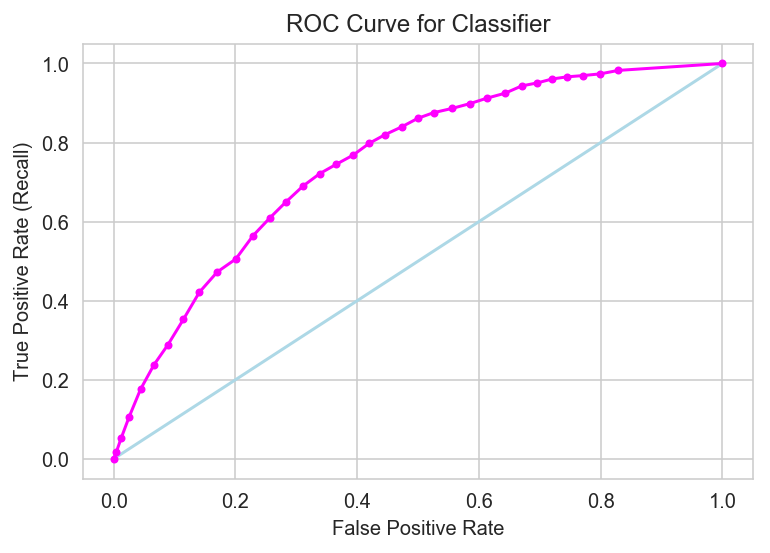

In [442]:
stats_train_knn2, stats_validation_knn2, stats_test_knn2, best_knn2 = search('grid',features,target,3,KNeighborsClassifier)

In [443]:
stats_train_knn = stats_train_knn2
stats_validation_knn = stats_validation_knn2
stats_test_knn = stats_test_knn2
best_knn = best_knn2

## Comparison of Results

In [444]:
all_stats_train = pd.concat((stats_train_logit,stats_train_svm,stats_train_rf,stats_train_mlp,stats_train_knn))
all_stats_test = pd.concat((stats_test_logit,stats_test_svm,stats_test_rf,stats_test_mlp,stats_test_knn))
all_stats_train['Statistic'] = all_stats_train.index
all_stats_test['Statistic'] = all_stats_test.index

In [445]:
class_list = ['Logistic']*5 + ['SVM']*5 + ['Random Forest']*5 + ['MLP']*5 + ['KNN']*5
all_stats_train['Classifier'] = class_list
all_stats_test['Classifier'] = class_list

In [446]:
plot_df_test = pd.melt(all_stats_test,id_vars = ['Statistic','Classifier'],var_name='Ground Truth',value_name='Percentage')

In [452]:
np.random.shuffle(c)

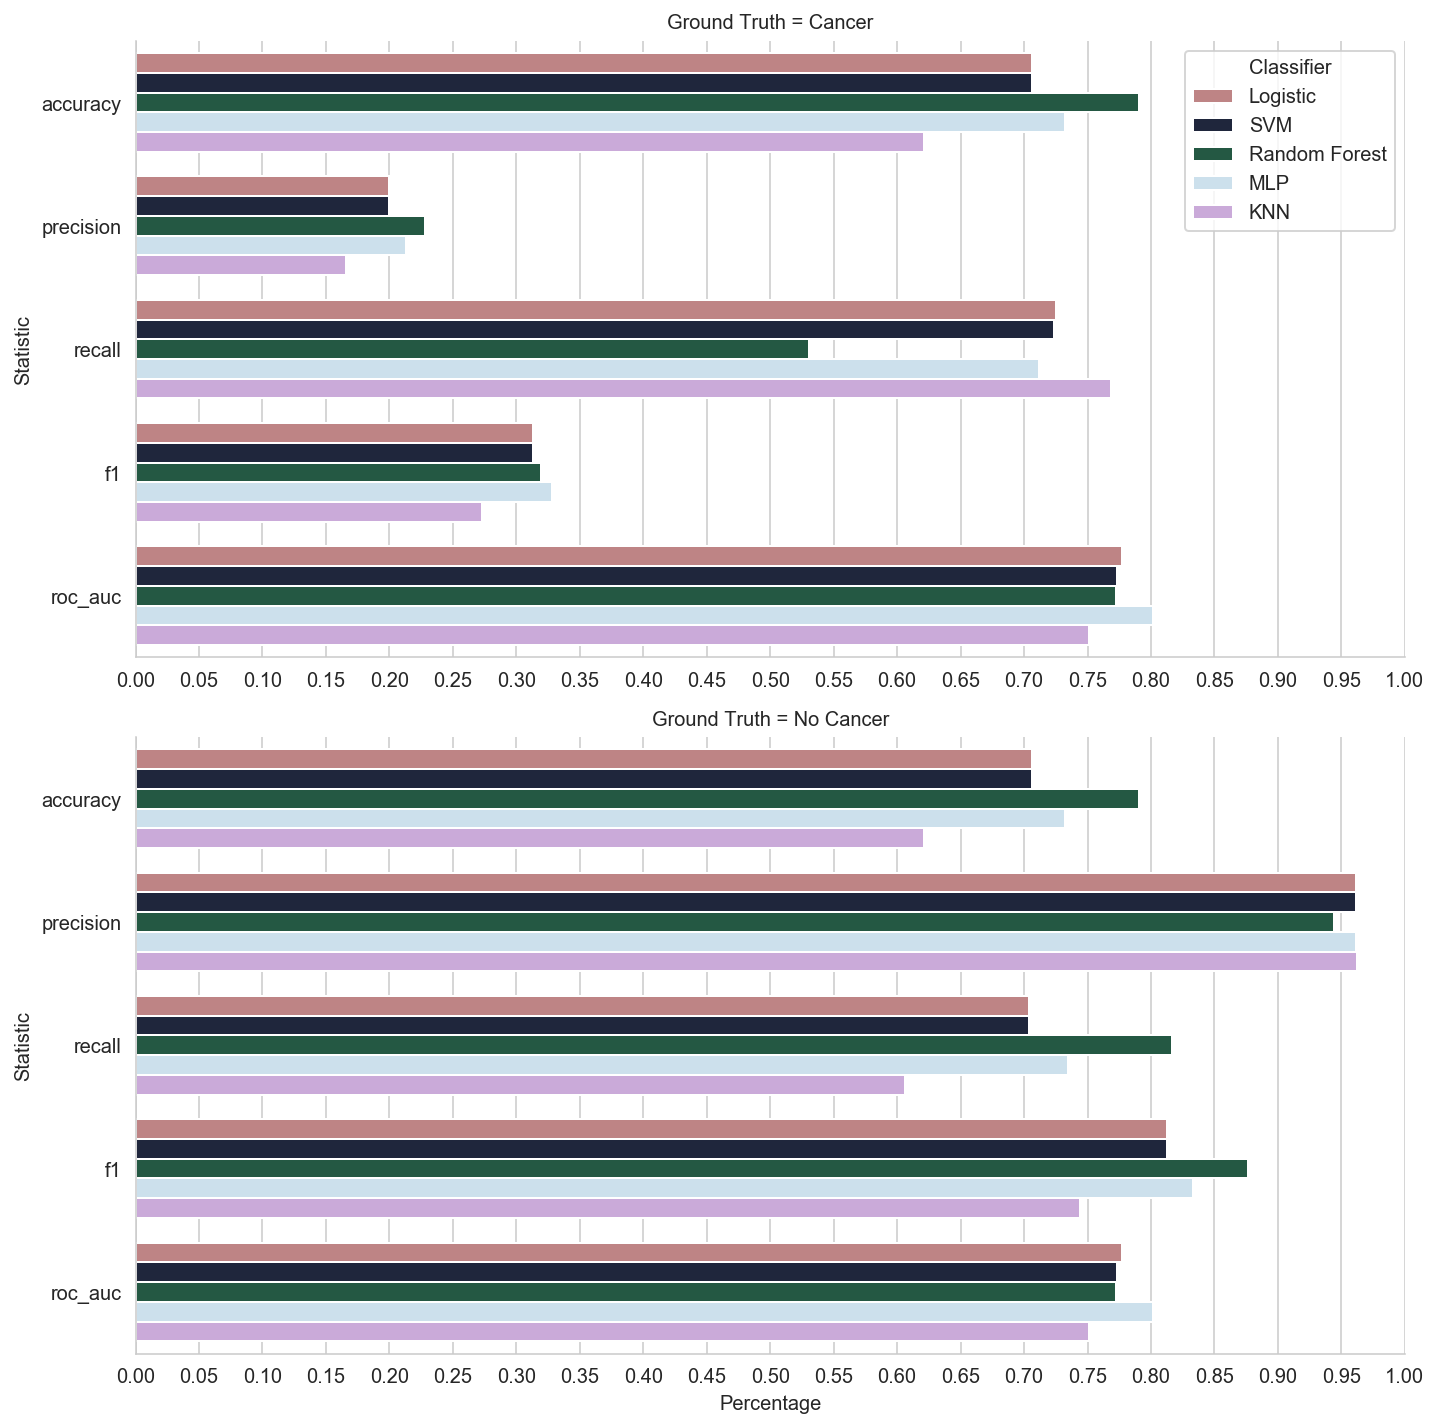

In [448]:
# Test results for cancer vs no cancer
p=sns.catplot(x="Percentage", y="Statistic", hue="Classifier",row="Ground Truth", row_order=['Cancer','No Cancer'],data=plot_df_test, kind="bar", height=5, aspect=2,palette=c,orient='h',legend_out=False,sharex=False);

p.set(xlim=(0,1),xticks=np.arange(0, 1.05, 0.05));

In [491]:
#Train vs test
all_stats_train.rename(columns={0:'Percentage'},inplace=True)

df=pd.concat([all_stats_train,all_stats_test['Cancer']],axis=1) # does equivalent of join - match up train results to result for cancer prediction

df.rename(columns={'Cancer':'Test', 'Percentage':'Train'},inplace=True)

plot_df_trainvtest = pd.melt(df,id_vars = ['Statistic','Classifier'],var_name='Train or Test',value_name='Percentage')

#plot_df_trainvtest

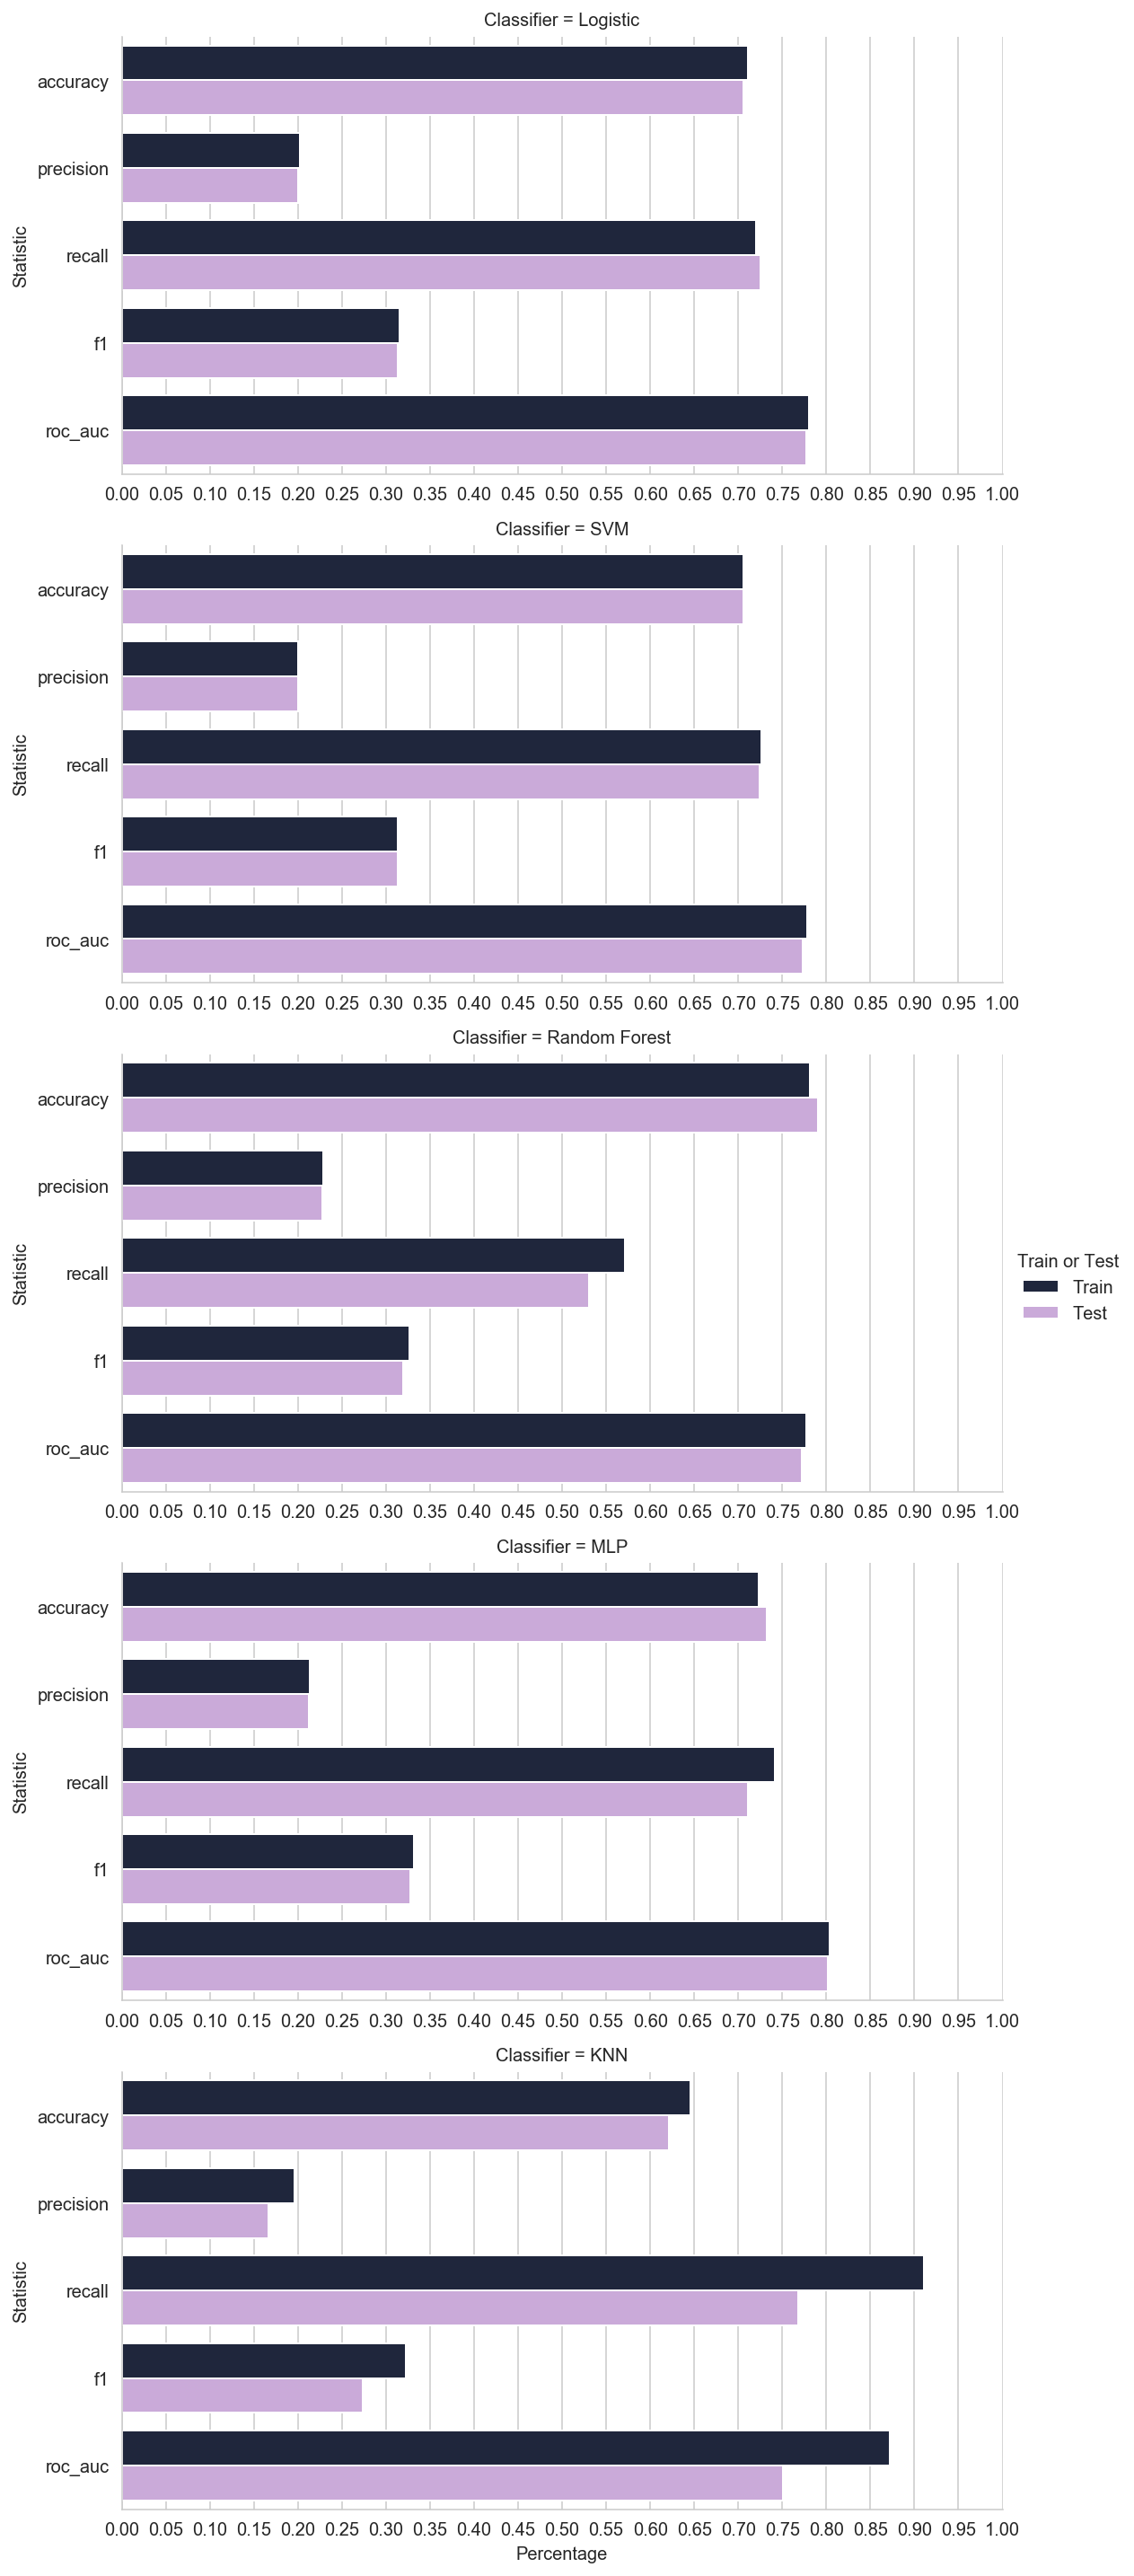

In [492]:
p=sns.catplot(x="Percentage", y="Statistic", hue="Train or Test",row="Classifier", data=plot_df_trainvtest, kind="bar", height=4, aspect=2,palette=c,orient='h',sharex=False);
p.set(xlim=(0,1),xticks=np.arange(0, 1.05, 0.05));

#### Relative Risks of Chlamydia and Cancer

In [509]:
f = features
t = target

n=len(t)

#col = np.where(names == 'LBXHIVC#1.0')
#col = np.where(names == 'SMQ020#1.0')

indsno1 = (features_df['SXQ272#2.0'] == 1)
indsno2 = (features_df['URXUCL#2.0'] == 1)
indsno = [indsno1[i] or indsno2[i] for i in range(n)]

indsurvey = np.where(ds.names == 'SXQ272#1.0')
indurine = np.where(ds.names == 'URXUCL#1.0')
indsyes1 = (ds.features[:,indsurvey] == 1)
indsyes2 = (ds.features[:,indurine] == 1)

indsyes = [indsyes1[i] or indsyes2[i] for i in range(n)]
indsyes = [indsyes[i][0][0] for i in range(n)]

allinds = [indsyes[i] or indsno[i] for i in range(n)]

disease = np.array([np.nan]*n)
disease[indsno] = np.tile(0,np.sum(indsno))
disease[indsyes] = np.tile(1,np.sum(indsyes))
disease = disease[allinds]

t = t[allinds]

contingency = pd.crosstab(t,disease)
contingency

RR = (contingency[1][1]/np.sum(contingency[1][:])) / (contingency[0][1]/np.sum(contingency[0][:]))
RR

0.47641197170830285

In [504]:
print(contingency)

col_0    0.0  1.0
row_0            
0      26284  477
1       1063    9


In [512]:
np.sum(np.sum(contingency))/n

0.5628058397702916

In [514]:
np.sum(target)

4578

In [516]:
n

49454

In [515]:
allnocancerct=np.sum(contingency.iloc[0])
allcancerct=np.sum(contingency.iloc[1])
print(allnocancerct,allcancerct)


allcancer = np.sum(target)
allnocancer = n - allcancer

cancernoct = allcancer - allcancerct
nocancernoct = allnocancer - allnocancerct

print(cancernoct,nocancernoct)

RR = (cancernoct/(cancernoct+nocancernoct)) / (allcancerct/(allcancerct+allnocancerct))
RR

26761 1072
3506 18115


4.210186838114133

In [475]:
stats=all_stats_test.drop(columns=['No Cancer'])

In [476]:
stats=stats.pivot(index='Classifier',columns='Statistic')

In [477]:
stats=stats['Cancer'].sort_values('recall')[::-1]

In [478]:
stats

Statistic      accuracy        f1  precision    recall   roc_auc
Classifier                                                      
KNN            0.621373  0.273239   0.166155  0.768559  0.751189
Logistic       0.705894  0.313429   0.199940  0.724891  0.777009
SVM            0.705995  0.313179   0.199819  0.723799  0.773600
MLP            0.732181  0.327836   0.212990  0.711454  0.801291
Random Forest  0.790314  0.319107   0.228169  0.530568  0.772473

In [454]:
rates = all_stats_test[all_stats_test['Statistic']=='recall']

In [455]:
rates

No Cancer    Cancer Statistic     Classifier
recall   0.703955  0.724891    recall       Logistic
recall   0.704178  0.723799    recall            SVM
recall   0.816825  0.530568    recall  Random Forest
recall   0.734276  0.711454    recall            MLP
recall   0.606351  0.768559    recall            KNN

In [456]:
tpr = rates['Cancer']
1-tpr.iloc[0]

0.27510917030567683

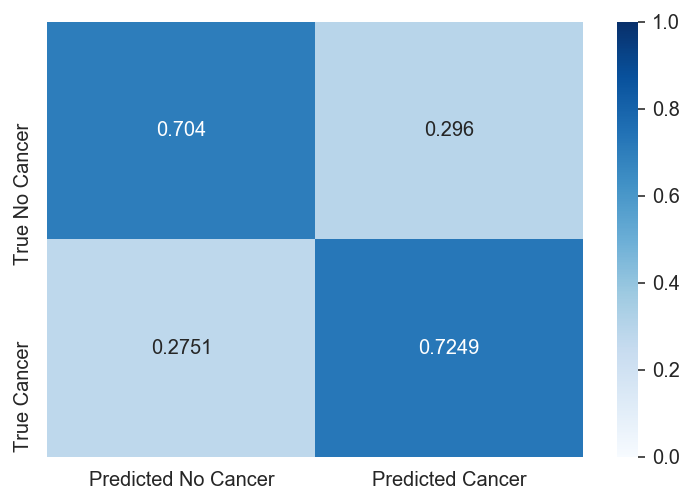

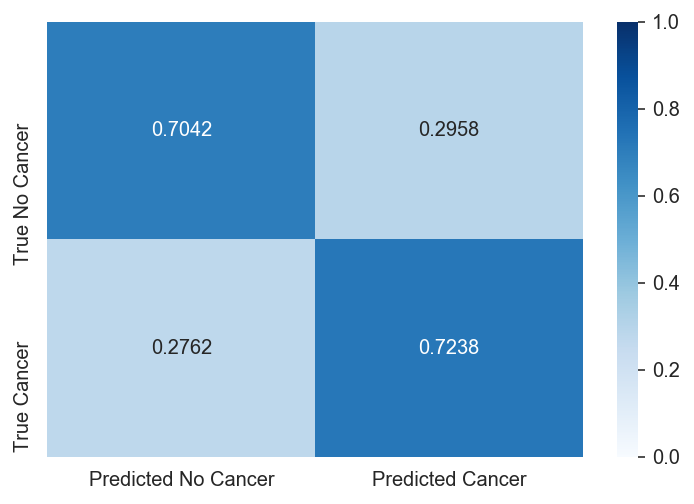

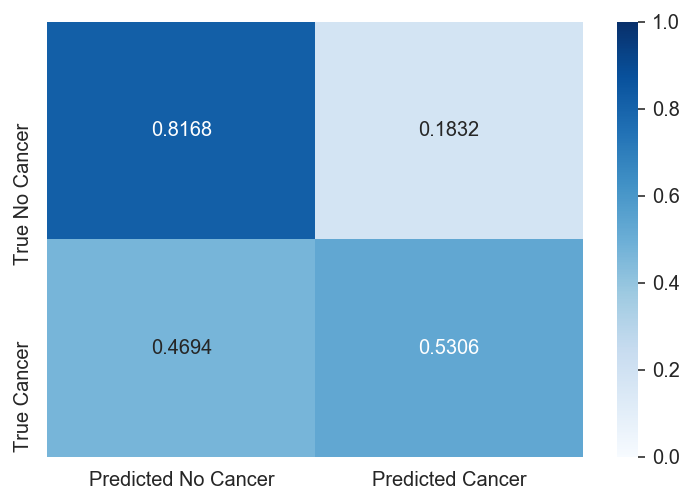

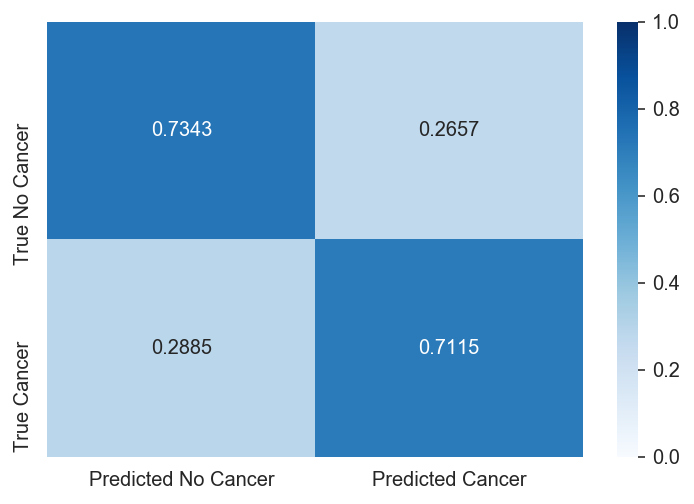

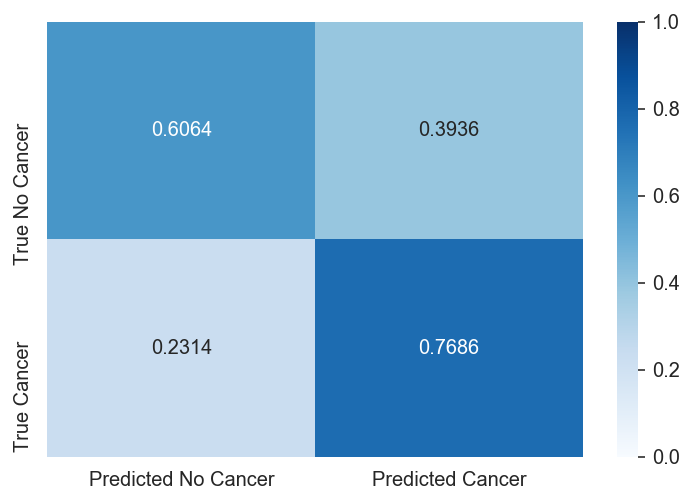

In [457]:
for i in range(rates.shape[0]):
    tpr = rates['Cancer'].iloc[i]
    tnr = rates['No Cancer'].iloc[i]
    confusion = np.array([[tnr,1-tnr],[1-tpr,tpr]])
    plt.figure()
    sns.heatmap(confusion,annot=True,xticklabels=['Predicted No Cancer','Predicted Cancer'],yticklabels=['True No Cancer','True Cancer'],cmap='Blues',vmin=0,vmax=1,fmt='.4')

In [480]:
clf = KNeighborsClassifier()
type='random'
k=3

scores = ['accuracy','precision','recall','f1','roc_auc']

f_train, f_test, t_train, t_test = train_test_split(features[:5000], target[:5000], test_size=0.2, stratify=target[:5000])

# Balance classes
#ros = RandomOverSampler(sampling_strategy = 'minority')
ros = SMOTE(sampling_strategy = 'minority')
pipeline = Pipeline([('sampling', ros), ('class', clf)])

param_grid = get_params(KNeighborsClassifier)

if type=='grid':
    clf_grid = GridSearchCV(pipeline, param_grid, scoring=scores, refit='recall', cv=k, verbose=2,return_train_score=True)
elif type=='random':
    clf_grid = RandomizedSearchCV(pipeline, param_grid, n_iter=20, scoring=scores, refit='recall', cv=k, verbose=2)

clf_grid.fit(f_train,t_train)

params=clf_grid.best_params_
res=clf_grid.cv_results_

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] class__weights=uniform, class__n_neighbors=25, class__metric=minkowski 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class__weights=uniform, class__n_neighbors=25, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=25, class__metric=minkowski 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV]  class__weights=uniform, class__n_neighbors=25, class__metric=minkowski, total=   2.2s
[CV] class__weights=uniform, class__n_neighbors=25, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=25, class__metric=minkowski, total=   2.3s
[CV] class__weights=distance, class__n_neighbors=25, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=25, class__metric=minkowski, total=   2.0s
[CV] class__weights=distance, class__n_neighbors=25, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=25, class__metric=minkowski, total=   1.9s
[CV] class__weights=distance, class__n_neighbors=25, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=25, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=26, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=26, class__metric=minkowski, total=   2.4s
[CV] class__weights=uniform, class__n_neighbors=26, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=26, class__metric=minkowski, total=   2.0s
[CV] class__weights=uniform, class__n_neighbors=26, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=26, class__metric=minkowski, total=   2.2s
[CV] class__weights=distance, class__n_neighbors=26, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=26, class__metric=minkowski, total=   1.8s
[CV] class__weights=distance, class__n_neighbors=26, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=26, class__metric=minkowski, total=   2.0s
[CV] class__weights=distance, class__n_neighbors=26, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=26, class__metric=minkowski, total=   2.2s
[CV] class__weights=uniform, class__n_neighbors=27, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=27, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=27, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=27, class__metric=minkowski, total=   2.3s
[CV] class__weights=uniform, class__n_neighbors=27, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=27, class__metric=minkowski, total=   2.2s
[CV] class__weights=distance, class__n_neighbors=27, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=27, class__metric=minkowski, total=   1.9s
[CV] class__weights=distance, class__n_neighbors=27, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=27, class__metric=minkowski, total=   2.1s
[CV] class__weights=distance, class__n_neighbors=27, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=27, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=28, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=28, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=28, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=28, class__metric=minkowski, total=   2.2s
[CV] class__weights=uniform, class__n_neighbors=28, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=28, class__metric=minkowski, total=   2.1s
[CV] class__weights=distance, class__n_neighbors=28, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=28, class__metric=minkowski, total=   2.0s
[CV] class__weights=distance, class__n_neighbors=28, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=28, class__metric=minkowski, total=   1.9s
[CV] class__weights=distance, class__n_neighbors=28, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=28, class__metric=minkowski, total=   2.2s
[CV] class__weights=uniform, class__n_neighbors=29, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=29, class__metric=minkowski, total=   2.2s
[CV] class__weights=uniform, class__n_neighbors=29, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=29, class__metric=minkowski, total=   2.3s
[CV] class__weights=uniform, class__n_neighbors=29, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=29, class__metric=minkowski, total=   2.1s
[CV] class__weights=distance, class__n_neighbors=29, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=29, class__metric=minkowski, total=   2.0s
[CV] class__weights=distance, class__n_neighbors=29, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=29, class__metric=minkowski, total=   1.9s
[CV] class__weights=distance, class__n_neighbors=29, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=29, class__metric=minkowski, total=   2.0s
[CV] class__weights=uniform, class__n_neighbors=30, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=30, class__metric=minkowski, total=   2.5s
[CV] class__weights=uniform, class__n_neighbors=30, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=30, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=30, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=30, class__metric=minkowski, total=   2.4s
[CV] class__weights=distance, class__n_neighbors=30, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=30, class__metric=minkowski, total=   2.4s
[CV] class__weights=distance, class__n_neighbors=30, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=30, class__metric=minkowski, total=   2.2s
[CV] class__weights=distance, class__n_neighbors=30, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=30, class__metric=minkowski, total=   2.8s
[CV] class__weights=uniform, class__n_neighbors=31, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=31, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=31, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=31, class__metric=minkowski, total=   2.0s
[CV] class__weights=uniform, class__n_neighbors=31, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=31, class__metric=minkowski, total=   2.7s
[CV] class__weights=distance, class__n_neighbors=31, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=31, class__metric=minkowski, total=   2.2s
[CV] class__weights=distance, class__n_neighbors=31, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=31, class__metric=minkowski, total=   2.1s
[CV] class__weights=distance, class__n_neighbors=31, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=31, class__metric=minkowski, total=   2.0s
[CV] class__weights=uniform, class__n_neighbors=32, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=32, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=32, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=32, class__metric=minkowski, total=   2.6s
[CV] class__weights=uniform, class__n_neighbors=32, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=32, class__metric=minkowski, total=   2.5s
[CV] class__weights=distance, class__n_neighbors=32, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=32, class__metric=minkowski, total=   2.0s
[CV] class__weights=distance, class__n_neighbors=32, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=32, class__metric=minkowski, total=   2.0s
[CV] class__weights=distance, class__n_neighbors=32, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=32, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=33, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=33, class__metric=minkowski, total=   2.2s
[CV] class__weights=uniform, class__n_neighbors=33, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=33, class__metric=minkowski, total=   2.5s
[CV] class__weights=uniform, class__n_neighbors=33, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=33, class__metric=minkowski, total=   2.7s
[CV] class__weights=distance, class__n_neighbors=33, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=33, class__metric=minkowski, total=   2.1s
[CV] class__weights=distance, class__n_neighbors=33, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=33, class__metric=minkowski, total=   2.0s
[CV] class__weights=distance, class__n_neighbors=33, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=33, class__metric=minkowski, total=   2.2s
[CV] class__weights=uniform, class__n_neighbors=34, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=34, class__metric=minkowski, total=   2.3s
[CV] class__weights=uniform, class__n_neighbors=34, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=34, class__metric=minkowski, total=   2.1s
[CV] class__weights=uniform, class__n_neighbors=34, class__metric=minkowski 


[CV]  class__weights=uniform, class__n_neighbors=34, class__metric=minkowski, total=   2.2s
[CV] class__weights=distance, class__n_neighbors=34, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=34, class__metric=minkowski, total=   2.0s
[CV] class__weights=distance, class__n_neighbors=34, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=34, class__metric=minkowski, total=   2.1s
[CV] class__weights=distance, class__n_neighbors=34, class__metric=minkowski 


[CV]  class__weights=distance, class__n_neighbors=34, class__metric=minkowski, total=   2.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.4min finished


In [485]:
order = res['mean_test_recall'].argsort()
y=res['mean_test_recall'][order][::-1]

In [486]:
x=res['mean_test_precision'][order][::-1]

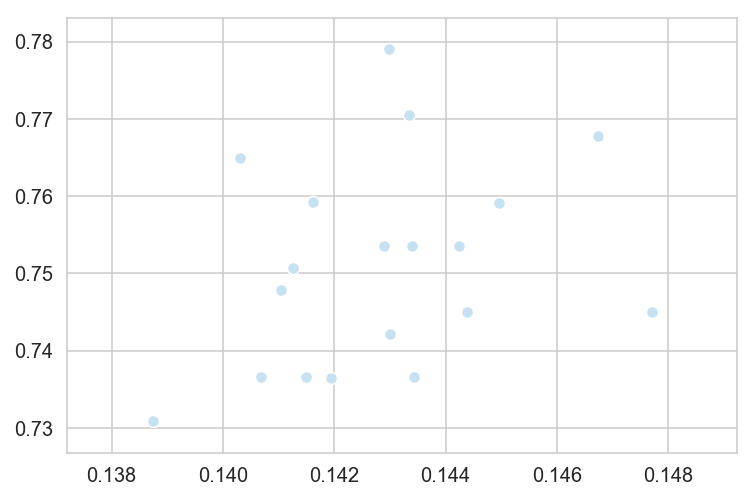

In [490]:
sns.scatterplot(x,y);

In [483]:
np.array(res['params'])[order][::-1]

array([{'class__weights': 'uniform', 'class__n_neighbors': 27, 'class__metric': 'minkowski'},
       {'class__weights': 'distance', 'class__n_neighbors': 34, 'class__metric': 'minkowski'},
       {'class__weights': 'distance', 'class__n_neighbors': 31, 'class__metric': 'minkowski'},
       {'class__weights': 'uniform', 'class__n_neighbors': 33, 'class__metric': 'minkowski'},
       {'class__weights': 'uniform', 'class__n_neighbors': 31, 'class__metric': 'minkowski'},
       {'class__weights': 'uniform', 'class__n_neighbors': 29, 'class__metric': 'minkowski'},
       {'class__weights': 'distance', 'class__n_neighbors': 29, 'class__metric': 'minkowski'},
       {'class__weights': 'uniform', 'class__n_neighbors': 32, 'class__metric': 'minkowski'},
       {'class__weights': 'distance', 'class__n_neighbors': 32, 'class__metric': 'minkowski'},
       {'class__weights': 'distance', 'class__n_neighbors': 33, 'class__metric': 'minkowski'},
       {'class__weights': 'uniform', 'class__n_neighbor

In [517]:
features.shape

(49454, 37)